In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_theme(style="whitegrid")
sns.color_palette("rocket", as_cmap=True)
sns.set_palette("pastel")
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

/Users/yashica/opt/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
data_dir = "../data/"
plots_dir = "../plots/"

In [4]:
reviews = pd.read_csv(data_dir+"reviews.csv")
reviews.drop("Unnamed: 0", inplace=True, axis=1)

In [5]:
reviews["game_name"]=reviews.game_name.str.split("       ",expand=True,)[0]
reviews.head()

,game_id,game_name,score,author,date,summary
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis..."
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...


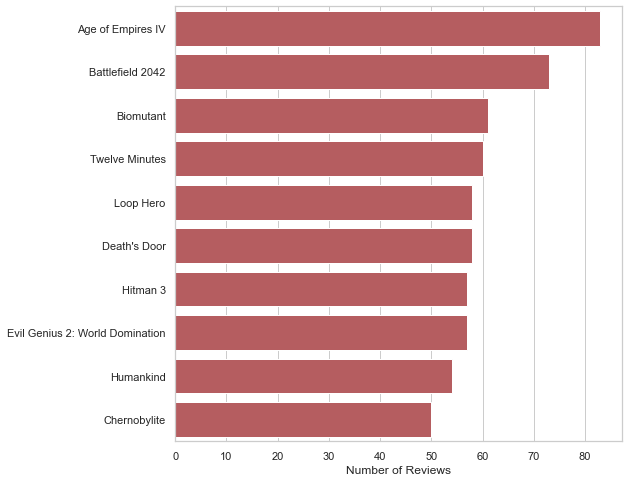

In [6]:
#number of reviews for games
data = pd.DataFrame(reviews.game_name.value_counts()[:10])
data.reset_index(inplace=True)
sns.barplot(x="game_name", y="index", data=data, color="r")
plt.xlabel("Number of Reviews")
plt.ylabel("");

In [7]:
stop_words=set(stopwords.words("english"))

#tokenised list of reviews that do not contain stop words
def tokenized_summary(x):
    filtered_sent=[]
    for w in word_tokenize(x):
        if w not in stop_words:
            filtered_sent.append(w)
    return filtered_sent

reviews["tokenised"] = reviews['summary'].apply(lambda x: tokenized_summary(x))

In [8]:
#Lemmatization 
import string
lem = WordNetLemmatizer()
def lemmatized_list(x):
    lemmatized=[]
    for w in x:
        lemmatized.append(lem.lemmatize(w))
    final_string =  " ".join(lemmatized)
    return final_string.translate(str.maketrans('', '', string.punctuation))


reviews["lemmatized"] = reviews['tokenised'].apply(lambda x: lemmatized_list(x))


In [9]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...


In [10]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

def vader_sentiment(x):
    sentiment_dict = sid_obj.polarity_scores(x)
    if sentiment_dict['compound'] > 0.05:
        return pd.Series(['positive', sentiment_dict['compound']])
    elif sentiment_dict['compound'] <= -0.05:
        return pd.Series(['negative', sentiment_dict['compound']])
    else:
        return pd.Series(['neutral',sentiment_dict['compound']])

reviews[["sentiment_label", 'sentiment_value']] = reviews['summary'].apply(lambda x: vader_sentiment(x))


In [11]:
reviews.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4731


In [12]:
sentiments_group = reviews.groupby(by=['game_name'])['sentiment_value'].agg('mean').reset_index()
sentiments_group.columns = ['game_name', 'average_sentiment']


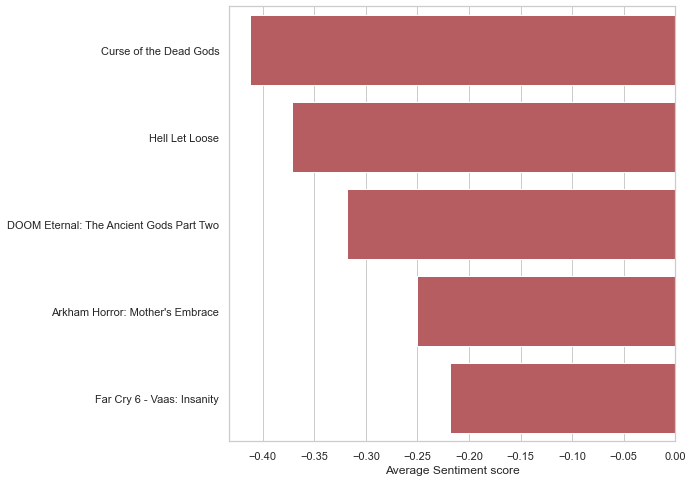

In [13]:
#Top 5 negative sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[:5]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="r")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

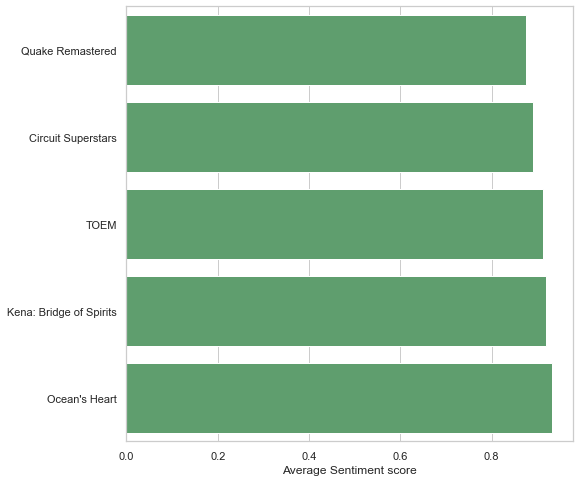

In [14]:
#Top 5 Positive sentiment Games 
negative = sentiments_group.sort_values(by='average_sentiment')[-5:]
sns.barplot(y="game_name", x="average_sentiment", data=negative, color="g")
plt.xlabel("Average Sentiment score")
plt.ylabel("");

Ocean's Heart reviews has the highest average positive sentiment whereas Curse of the Dear Gods has the worst average sentiment score

## TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=word_tokenize, min_df=10, max_features=500) 
vectors = vectorizer.fit_transform(reviews['lemmatized'])

feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tfidf = pd.DataFrame(denselist, columns=feature_names)

#tfidf originally made ~2500 words in the doc but in my opinion with 5000 reviews, 
#we can narrrow down to top 500 words 

In [16]:
column_names = tfidf.columns
column_names

Index(['2', '2021', '2042', '3', '4', '5', 'a', 'ability', 'able',
       'absolutely',
       ...
       'would', 'writing', 'year', 'yet', 'you', '–', '—', '’', '“', '”'],
      dtype='object', length=500)

We need to drop the numbers or years in the review as they are not important for our analysis

In [17]:
#removing columns that have integers/ years
columns_excluded = []
for w in column_names: 
    try:
        int(w)
        columns_excluded.append(w)
    except:
        None
        
tfidf.drop(columns=columns_excluded, inplace=True)

In [18]:
final_df = reviews.join(tfidf)
final_df.head()

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value,...,would,writing,year,yet,you,–,—,’,“,”
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.435831,0.0,0.0
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142,...,0.0,0.0,0.000000,0.000000,0.0,0.261586,0.0,0.353187,0.0,0.0
2,0,Disco Elysium: The Final Cut,100,KeenGamer,"Apr 26, 2021","Enhanced with fantastic and fresh content, Dis...","[Enhanced, fantastic, fresh, content, ,, Disco...",Enhanced fantastic fresh content Disco Elysiu...,positive,0.9423,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.146406,0.0,0.0
3,0,Disco Elysium: The Final Cut,100,GameSpot,"Apr 15, 2021",A fully voiced cast and new content of compara...,"[A, fully, voiced, cast, new, content, compara...",A fully voiced cast new content comparable qua...,positive,0.8705,...,0.0,0.0,0.159141,0.177394,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0,Disco Elysium: The Final Cut,100,Wccftech,"Apr 15, 2021",Disco Elysium: The Final Cut doesn't shy away ...,"[Disco, Elysium, :, The, Final, Cut, n't, shy,...",Disco Elysium The Final Cut nt shy away probl...,negative,-0.4731,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [19]:
final_df.to_csv(data_dir+"tfidf.csv")

VADER doesn't seem to be performing well for the reviews dataset. For example for the review below, it gives it a negative sentiment but it's not exactly a negative review and the score given by reviewer is 100.  With GPT3, we get a positive sentiment which makes more sense (https://beta.openai.com/playground/p/default-tweet-classifier?model=text-davinci-001). 

In [20]:
final_df.iloc[4,5] 

"Disco Elysium: The Final Cut doesn't shy away from its problems, but each one just cements how interesting those flaws are. Minor technical issues can be fixed, but what the game does, how it does it, and how the player responds is something that no other medium, no other game has achieved."

In [21]:
final_df.iloc[4,8] 

'negative'

In [23]:
final_df.head(2)

,game_id,game_name,score,author,date,summary,tokenised,lemmatized,sentiment_label,sentiment_value,...,would,writing,year,yet,you,–,—,’,“,”
0,0,Disco Elysium: The Final Cut,100,GameGrin,"Oct 15, 2021",Traversing the mind of your character is as mu...,"[Traversing, mind, character, much, plot, case...",Traversing mind character much plot case ’ try...,negative,-0.2960,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.435831,0.0,0.0
1,0,Disco Elysium: The Final Cut,100,Shindig,"Jun 18, 2021",Disco Elysium – The Final Cut is something rar...,"[Disco, Elysium, –, The, Final, Cut, something...",Disco Elysium – The Final Cut something rare ...,positive,0.9142,...,0.0,0.0,0.0,0.0,0.0,0.261586,0.0,0.353187,0.0,0.0


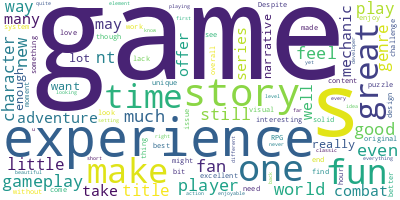

In [29]:
#!pip install wordcloud
from wordcloud import WordCloud
long_string = ','.join(list(final_df['lemmatized'].values))
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Need to drop "game" word since it seems to be the top most topic but it is not helpful here.

In [58]:
#final_df['lemmatized'] = final_df['lemmatized'].str.replace('game', '')
final_df['lemmatized'] = final_df['lemmatized'].str.replace('play', '')

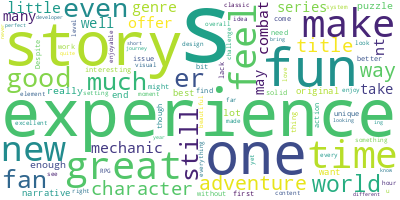

In [59]:
long_string = ','.join(list(final_df['lemmatized'].values))
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

We can see reviews contain information about character, narrative, story, feel, experience etc

In [90]:
#!pip install gensim
import gensim
from gensim.utils import simple_preprocess
import nltk
stop_words = stopwords.words('english')
stop_words.extend(['game','like', 'new','good', 'great', 'much','best', 'one', 'from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = final_df.lemmatized.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['traversing', 'mind', 'character', 'plot', 'case', 'trying', 'solve', 'immersed', 'world', 'revachol', 'struggling', 'leave']


In [91]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [92]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"nt" + 0.006*"experience" + 0.005*"fan" + 0.005*"story" + '
  '0.005*"world" + 0.005*"fun" + 0.005*"make" + 0.005*"mechanic" + '
  '0.005*"little" + 0.004*"feel"'),
 (1,
  '0.007*"time" + 0.006*"way" + 0.006*"story" + 0.005*"experience" + '
  '0.005*"er" + 0.005*"get" + 0.004*"find" + 0.004*"feel" + 0.004*"lot" + '
  '0.004*"genre"'),
 (2,
  '0.007*"make" + 0.006*"still" + 0.005*"world" + 0.005*"story" + 0.005*"nt" + '
  '0.005*"time" + 0.005*"fan" + 0.005*"genre" + 0.005*"combat" + '
  '0.005*"experience"'),
 (3,
  '0.007*"fun" + 0.006*"experience" + 0.006*"make" + 0.006*"fan" + '
  '0.005*"mechanic" + 0.005*"want" + 0.004*"time" + 0.004*"would" + '
  '0.004*"well" + 0.004*"offer"'),
 (4,
  '0.007*"story" + 0.006*"fan" + 0.005*"fun" + 0.004*"make" + 0.004*"little" + '
  '0.004*"design" + 0.004*"come" + 0.004*"series" + 0.004*"time" + '
  '0.004*"may"'),
 (5,
  '0.006*"time" + 0.006*"experience" + 0.005*"story" + 0.005*"offer" + '
  '0.005*"character" + 0.005*"fun" + 0.00

In [93]:
#!pip install pyldavis
import pyLDAvis.gensim_models
import os
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.005500 -0.009047       1        1  19.537318
7     -0.009698 -0.008211       2        1  12.942307
6     -0.004054 -0.001842       3        1  12.797875
2     -0.004589 -0.013436       4        1  12.649425
1     -0.004601 -0.018367       5        1  10.996682
0      0.001653 -0.006326       6        1   8.291359
8     -0.022830 -0.022938       7        1   6.522749
5     -0.021225  0.010327       8        1   6.006247
3     -0.008519  0.069635       9        1   5.279466
4      0.079363  0.000204      10        1   4.976572, topic_info=            Term         Freq        Total Category  logprob  loglift
271          fan   626.000000   626.000000  Default  30.0000  30.0000
272          fun   748.000000   748.000000  Default  29.0000  29.0000
266        offer   381.000000   381.000000  Default  28.0000  28.0000
28    experience  1087.000000  1087.000000  Default  27.0000  27.0000
442        would   361.000000   361.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1029      really    20.210250   385.356714  Topic10  -5.9687   0.0524
362         feel    23.237439   717.695819  Topic10  -5.8292  -0.4299
307         even    22.160992   672.102707  Topic10  -5.8766  -0.4116
11         world    21.854872   765.710371  Topic10  -5.8905  -0.5560
61         genre    20.200210   474.384493  Topic10  -5.9692  -0.1559

[940 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
11505      4  0.712325  absurdly
8805       3  0.215560  academia
8805       4  0.502972  academia
8805       6  0.071853  academia
8805       8  0.071853  academia
...      ...       ...       ...
8199       4  0.087043    zombie
8199       5  0.043522    zombie
8199       6  0.108804    zombie
8199       8  0.043522    zombie
8199       9  0.043522    zombie

[2899 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 7, 3, 2, 1, 9, 6, 4, 5])